In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Preparing the tools**

In [2]:
import pandas as pd
import glob
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##**Load the data**

In [45]:
path = '/content/drive/MyDrive/Colab Notebooks/US_Census Data Cleaning'
files = glob.glob(path + '/*.csv')
li = []
for f in files:
  temp_df = pd.read_csv(f)
  li.append(temp_df)
print(files)
us_census = pd.concat(li, axis=0)

['/content/drive/MyDrive/Colab Notebooks/US_Census Data Cleaning/states9.csv', '/content/drive/MyDrive/Colab Notebooks/US_Census Data Cleaning/states1.csv', '/content/drive/MyDrive/Colab Notebooks/US_Census Data Cleaning/states6.csv', '/content/drive/MyDrive/Colab Notebooks/US_Census Data Cleaning/states4.csv', '/content/drive/MyDrive/Colab Notebooks/US_Census Data Cleaning/states8.csv', '/content/drive/MyDrive/Colab Notebooks/US_Census Data Cleaning/states2.csv', '/content/drive/MyDrive/Colab Notebooks/US_Census Data Cleaning/states7.csv', '/content/drive/MyDrive/Colab Notebooks/US_Census Data Cleaning/states3.csv', '/content/drive/MyDrive/Colab Notebooks/US_Census Data Cleaning/states5.csv', '/content/drive/MyDrive/Colab Notebooks/US_Census Data Cleaning/states0.csv']


##**Exploratory Data Analysis (EDA)**

In [46]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Utah,2903379,13.468376068376063%,79.40683760683764%,1.0179487179487194%,1.0813675213675222%,2.196068376068376%,0.8259829059829059%,$63488.91780821918,1459229M_1444150F
1,1,Vermont,626604,1.6092896174863391%,93.98306010928961%,0.9808743169398909%,0.301639344262295%,1.2387978142076501%,0.03060109289617486%,$55602.96721311475,308573M_318031F
2,2,Virginia,8256630,8.0110164981373%,63.271048430015945%,20.17599787120807%,0.21245343267695582%,5.455242150079845%,0.06471527408195847%,$72866.01341201717,4060948M_4195682F
3,3,Washington,6985464,11.140968858131506%,72.03840830449816%,3.384429065743947%,1.4107266435986163%,7.022006920415224%,0.609896193771627%,$64493.76768377254,3487725M_3497739F
4,4,West Virginia,1851420,1.290909090909089%,92.17623966942146%,3.6628099173553723%,0.15268595041322316%,0.6824380165289253%,0.02644628099173554%,$41437.11157024794,913631M_937789F


In [47]:
us_census = us_census.drop('Unnamed: 0', axis=1)
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Utah,2903379,13.468376068376063%,79.40683760683764%,1.0179487179487194%,1.0813675213675222%,2.196068376068376%,0.8259829059829059%,$63488.91780821918,1459229M_1444150F
1,Vermont,626604,1.6092896174863391%,93.98306010928961%,0.9808743169398909%,0.301639344262295%,1.2387978142076501%,0.03060109289617486%,$55602.96721311475,308573M_318031F
2,Virginia,8256630,8.0110164981373%,63.271048430015945%,20.17599787120807%,0.21245343267695582%,5.455242150079845%,0.06471527408195847%,$72866.01341201717,4060948M_4195682F
3,Washington,6985464,11.140968858131506%,72.03840830449816%,3.384429065743947%,1.4107266435986163%,7.022006920415224%,0.609896193771627%,$64493.76768377254,3487725M_3497739F
4,West Virginia,1851420,1.290909090909089%,92.17623966942146%,3.6628099173553723%,0.15268595041322316%,0.6824380165289253%,0.02644628099173554%,$41437.11157024794,913631M_937789F


In [48]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 5
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      60 non-null     object
 1   TotalPop   60 non-null     int64 
 2   Hispanic   60 non-null     object
 3   White      60 non-null     object
 4   Black      60 non-null     object
 5   Native     60 non-null     object
 6   Asian      60 non-null     object
 7   Pacific    55 non-null     object
 8   Income     60 non-null     object
 9   GenderPop  60 non-null     object
dtypes: int64(1), object(9)
memory usage: 5.2+ KB


In [7]:
df = us_census # Copy of dataframe

In [49]:
us_census = us_census.drop_duplicates()

In [50]:
us_census.isna().sum() # Checking missing values

State        0
TotalPop     0
Hispanic     0
White        0
Black        0
Native       0
Asian        0
Pacific      4
Income       0
GenderPop    0
dtype: int64

In [51]:
# Splitting GenderPop into 2 columns
new = us_census["GenderPop"].str.split("_", n = 1, expand = True)
us_census["Men"]=new[0]
us_census["Women"]=new[1]
us_census.drop(columns=["GenderPop"],inplace=True)
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
0,Utah,2903379,13.468376068376063%,79.40683760683764%,1.0179487179487194%,1.0813675213675222%,2.196068376068376%,0.8259829059829059%,$63488.91780821918,1459229M,1444150F
1,Vermont,626604,1.6092896174863391%,93.98306010928961%,0.9808743169398909%,0.301639344262295%,1.2387978142076501%,0.03060109289617486%,$55602.96721311475,308573M,318031F
2,Virginia,8256630,8.0110164981373%,63.271048430015945%,20.17599787120807%,0.21245343267695582%,5.455242150079845%,0.06471527408195847%,$72866.01341201717,4060948M,4195682F
3,Washington,6985464,11.140968858131506%,72.03840830449816%,3.384429065743947%,1.4107266435986163%,7.022006920415224%,0.609896193771627%,$64493.76768377254,3487725M,3497739F
4,West Virginia,1851420,1.290909090909089%,92.17623966942146%,3.6628099173553723%,0.15268595041322316%,0.6824380165289253%,0.02644628099173554%,$41437.11157024794,913631M,937789F


In [52]:
# Removing characters from 'Men' and 'Women'
us_census['Men']=us_census['Men'].str.replace("M","")
us_census['Women']=us_census['Women'].str.replace("F","")

In [53]:
us_census['Men']=us_census['Men'].astype('int')
us_census['Women']=us_census['Women'].replace('','0') # Replacing empty places with 0
us_census['Women']=us_census['Women'].astype('int') # Now converting this column to 'int'

In [54]:
for label in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
  us_census[label]=us_census[label].str.replace('%','')
us_census['Income']=us_census['Income'].str.replace('$', '',regex=True)

In [14]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
0,Utah,2903379,13.468376068376063,79.40683760683764,1.0179487179487194,1.0813675213675222,2.196068376068376,0.8259829059829059,63488.91780821918,1459229,1444150
1,Vermont,626604,1.6092896174863391,93.98306010928961,0.9808743169398909,0.301639344262295,1.2387978142076501,0.03060109289617486,55602.96721311475,308573,318031
2,Virginia,8256630,8.0110164981373,63.271048430015945,20.17599787120807,0.21245343267695582,5.455242150079845,0.06471527408195847,72866.01341201717,4060948,4195682
3,Washington,6985464,11.140968858131506,72.03840830449816,3.384429065743947,1.4107266435986163,7.022006920415224,0.609896193771627,64493.76768377254,3487725,3497739
4,West Virginia,1851420,1.290909090909089,92.17623966942146,3.6628099173553723,0.15268595041322316,0.6824380165289253,0.02644628099173554,41437.11157024794,913631,937789


In [55]:
for label in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Income', 'Pacific']:
  us_census[label]=us_census[label].astype('float')
# Filling 'Pacific' null values
us_census['Pacific']=us_census['Pacific'].fillna(us_census['Pacific'].mean()) # Placing zeros at NaN in pacific column

In [56]:
us_census.isna().sum()

State       0
TotalPop    0
Hispanic    0
White       0
Black       0
Native      0
Asian       0
Pacific     0
Income      0
Men         0
Women       0
dtype: int64

In [57]:
def women_pop(row):
    if row['Women'] == 0:
        return row['TotalPop'] - row['Men']
    else:
        return row['Women']
# Apply the function to the 'Women' column
us_census['Women'] = us_census.apply(women_pop, axis=1)

In [58]:
us_census['Men'] = us_census['Men']/us_census['TotalPop']
us_census['Women'] = us_census['Women']/us_census['TotalPop']
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
0,Utah,2903379,13.468376,79.406838,1.017949,1.081368,2.196068,0.825983,63488.917808,0.502597,0.497403
1,Vermont,626604,1.609290,93.983060,0.980874,0.301639,1.238798,0.030601,55602.967213,0.492453,0.507547
2,Virginia,8256630,8.011016,63.271048,20.175998,0.212453,5.455242,0.064715,72866.013412,0.491841,0.508159
3,Washington,6985464,11.140969,72.038408,3.384429,1.410727,7.022007,0.609896,64493.767684,0.499283,0.500717
4,West Virginia,1851420,1.290909,92.176240,3.662810,0.152686,0.682438,0.026446,41437.111570,0.493476,0.506524


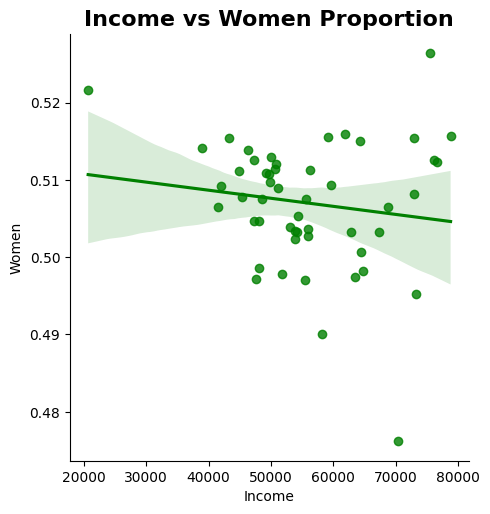

In [59]:
# Scatterplot for 'Men' and 'Women'
sns.lmplot(x='Income', y='Women', data=us_census, scatter_kws={'color': 'green'}, line_kws={'color': 'green'})
plt.title('Income vs Women Proportion', weight='bold', fontsize=16)
plt.show();

In [60]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 4
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     51 non-null     object 
 1   TotalPop  51 non-null     int64  
 2   Hispanic  51 non-null     float64
 3   White     51 non-null     float64
 4   Black     51 non-null     float64
 5   Native    51 non-null     float64
 6   Asian     51 non-null     float64
 7   Pacific   51 non-null     float64
 8   Income    51 non-null     float64
 9   Men       51 non-null     float64
 10  Women     51 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 4.8+ KB


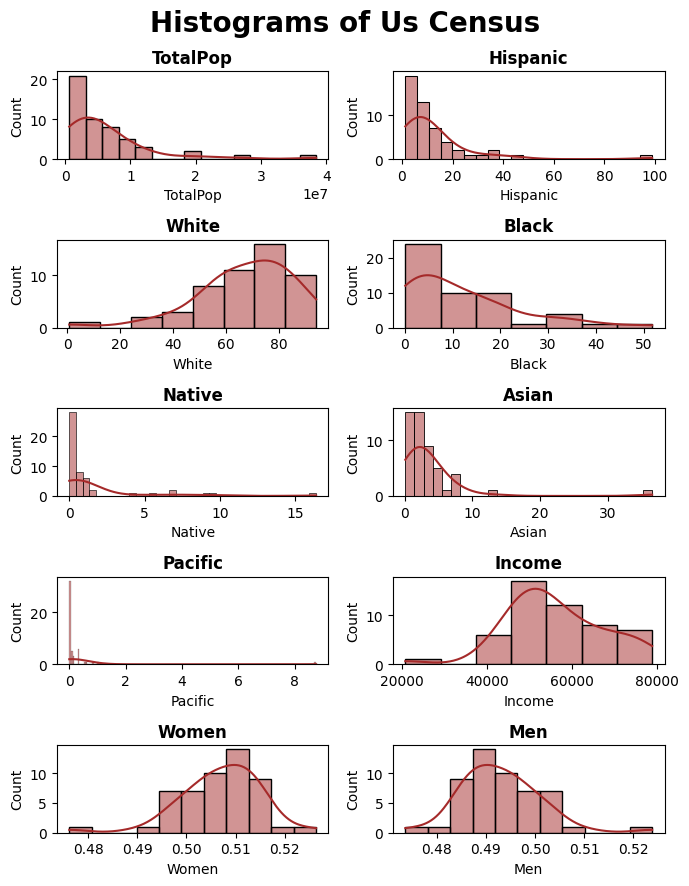

In [61]:
included_columns = ['TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Income', 'Women', 'Men']
num_rows = 5  # 5 rows
num_cols = 2  # 2 columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(7, 9))
axes = axes.flatten()
for i, col in enumerate(included_columns):
    sns.histplot(data=us_census, x=col, kde=True, ax=axes[i], color='brown')
    axes[i].set_title(f'{col}', weight='bold')
for i in range(len(included_columns), num_rows * num_cols):
    fig.delaxes(axes[i])
fig.suptitle('Histograms of Us Census', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

#**DONE!!!**
